In [1]:
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# Get stock 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

#confirm data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540046
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607439
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747403
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880662
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426826
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596100
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501350


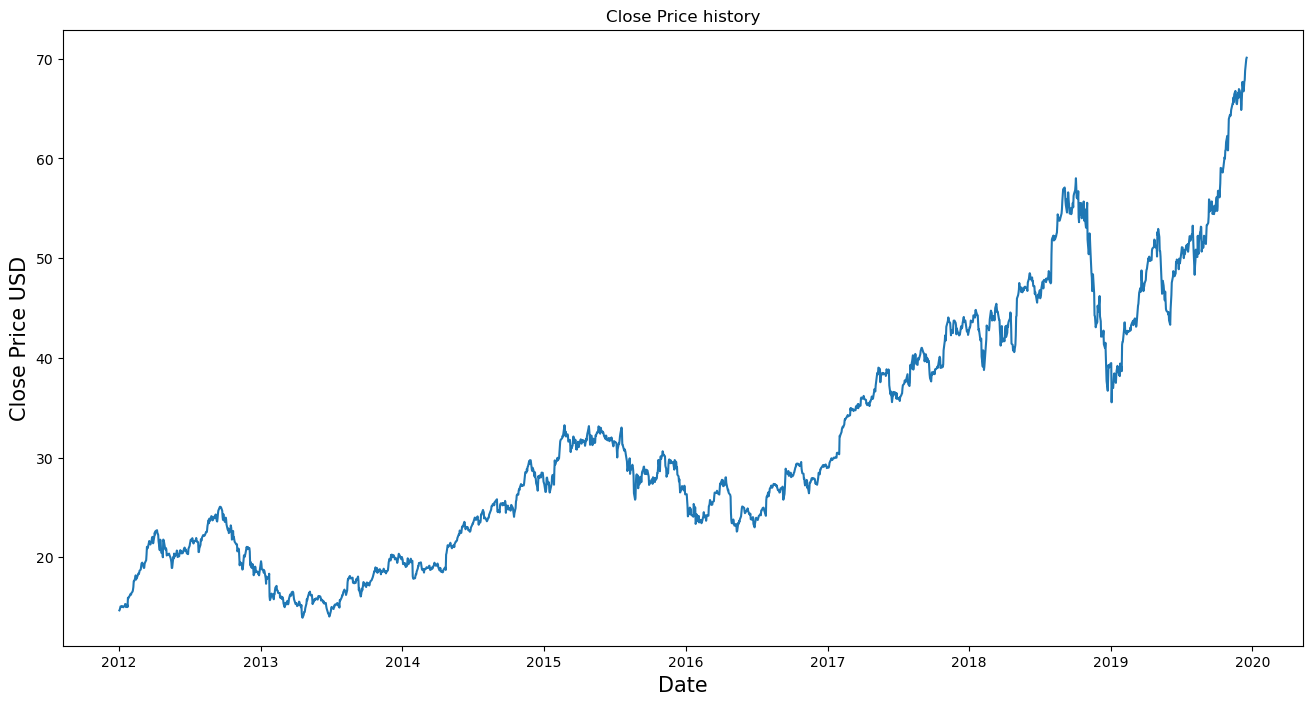

In [3]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Close Price USD', fontsize = 15)
plt.show()

In [4]:
# Data frame to numpy array
data = df.filter(['Close'])
dataset = data.values

#train length
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1603

In [5]:
#Scale/Normalization the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [6]:
#Create the training data set
#Create the scaled Training data set
train_data = scaled_data[0:training_data_len, :]

#split data x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [7]:
#Convert x & y to numpy for lstm model

x_train,y_train = np.array(x_train),np.array(y_train)

In [8]:
#Reshape because LSTM expects 3-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [9]:
# Build LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train
model.fit(x_train , y_train , batch_size=1 , epochs=1)

1543/1543 [==============================] - 25s 14ms/step - loss: 9.6752e-04


In [12]:
#Create test data_set

#create array with scaled values  from 1543 to 2003
test_data = scaled_data[training_data_len-60:,:]

#create x&y

x_test = []
y_test = dataset[training_data_len:,: ]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
#convert data to a numpy array & reshape

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [23]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 0s 10ms/step


In [15]:
#RMSE

rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

3.005899627537731

C:\Users\Noic Noic\AppData\Local\Temp\ipykernel_8008\1959628983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:, ('Predictions')] = predictions


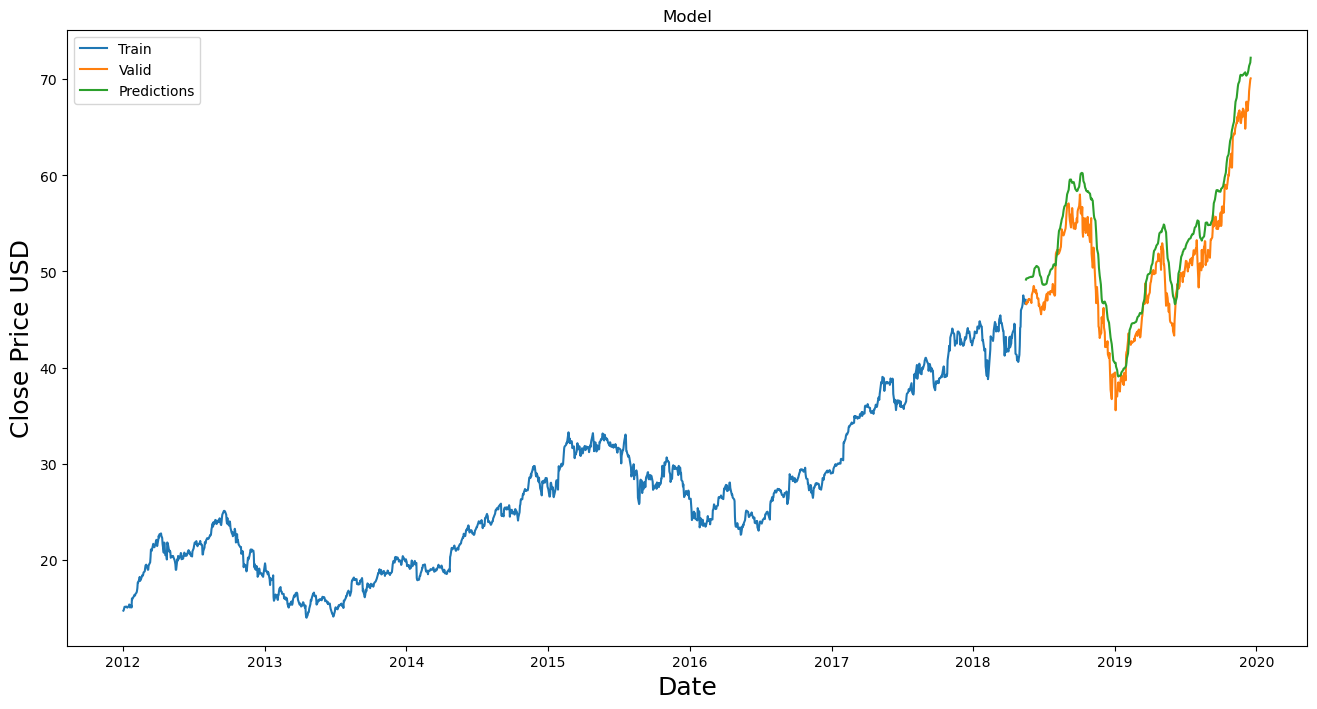

In [78]:
train = data[:training_data_len]
valid = data[training_data_len:]

#valid['Predictions'] = predictions
#valid.loc.__setitem__((slice(None), ('Predictions')), predictions)
valid.loc[:, ('Predictions')] = predictions

#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train' , 'Valid' , 'Predictions'])
plt.show()

In [71]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,49.155060
2018-05-18,46.577499,49.266548
2018-05-21,46.907501,49.297634
2018-05-22,46.790001,49.322304
2018-05-23,47.090000,49.325436
...,...,...
2019-12-11,67.692497,70.901703
2019-12-12,67.864998,71.138718
2019-12-13,68.787498,71.397499
